In [0]:
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step


In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

#把LABEL轉成NUMERICAL Categorical 
from keras.utils import to_categorical
y_Train_OneHot = to_categorical(y_train_label)
y_Test_OneHot = to_categorical(y_test_label)

In [4]:
from keras.models import Sequential
from keras.layers import Dense

#建立模型
model = Sequential()
model.add(Dense(256, kernel_initializer='normal', activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_Train_normalize, y_Train_OneHot,
                   validation_split=0.2, epochs=10, batch_size=128, verbose=1)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 63us/step - loss: 0.3172 - acc: 0.9107 - val_loss: 0.1716 - val_acc: 0.9515
Epoch 2/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.1435 - acc: 0.9575 - val_loss: 0.1247 - val_acc: 0.9634
Epoch 3/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0983 - acc: 0.9716 - val_loss: 0.1067 - val_acc: 0.9685
Epoch 4/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0747 - acc: 0.9778 - val_loss: 0.0934 - val_acc: 0.9724
Epoch 5/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.0582 - acc: 0.9825 - val_loss: 0.0946 - val_acc: 0.9705
Epoch 6/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0464 - acc: 0.9863 - val_loss: 0.0848 - val_acc: 0.9760
Epoch 7/

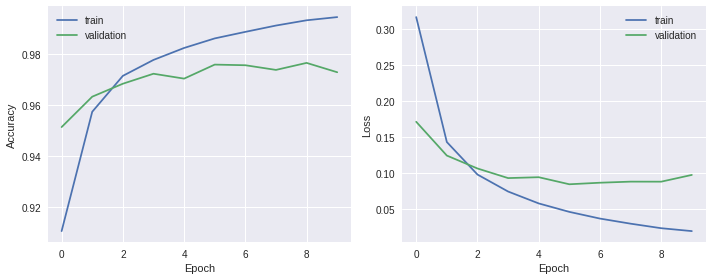

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(train_history.history['acc'], label='train')
    ax1.plot(train_history.history['val_acc'], label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(train_history.history['loss'], label='train')
    ax2.plot(train_history.history['val_loss'], label='validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    
show_train_history(history)